In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.optimizers import adam_v2

%matplotlib inline

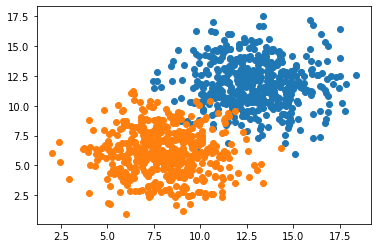

In [2]:
n_pts = 500
np.random.seed(0)
Xa = np.array([np.random.normal(13, 2, n_pts),
               np.random.normal(12, 2, n_pts)]).T
Xb = np.array([np.random.normal(8, 2, n_pts),
               np.random.normal(6, 2, n_pts)]).T

X = np.vstack((Xa, Xb))
y = np.matrix(np.append(np.zeros(n_pts), np.ones(n_pts))).T

plt.scatter(X[:n_pts, 0], X[:n_pts, 1])
plt.scatter(X[n_pts:, 0], X[n_pts:, 1])
plt.show()

In [3]:
model = Sequential()
model.add(Dense(units=1, input_shape=(2,), activation='sigmoid'))
adam = adam_v2.Adam(learning_rate=0.1)
model.compile(adam, loss='binary_crossentropy', metrics=['accuracy'])
h = model.fit(x=X, y=y, verbose=1, batch_size=50, epochs=150, shuffle='true')

Epoch 1/150
20/20 [==============================] - 0s 1ms/step - loss: 1.1399 - accuracy: 0.5010
Epoch 2/150
20/20 [==============================] - 0s 1ms/step - loss: 0.5407 - accuracy: 0.7340
Epoch 3/150
20/20 [==============================] - 0s 1ms/step - loss: 0.4261 - accuracy: 0.8470
Epoch 4/150
20/20 [==============================] - 0s 857us/step - loss: 0.3585 - accuracy: 0.8890
Epoch 5/150
20/20 [==============================] - 0s 1ms/step - loss: 0.3168 - accuracy: 0.9230
Epoch 6/150
20/20 [==============================] - 0s 870us/step - loss: 0.2836 - accuracy: 0.9290
Epoch 7/150
20/20 [==============================] - 0s 924us/step - loss: 0.2545 - accuracy: 0.9500
Epoch 8/150
20/20 [==============================] - 0s 969us/step - loss: 0.2342 - accuracy: 0.9450
Epoch 9/150
20/20 [==============================] - 0s 885us/step - loss: 0.2168 - accuracy: 0.9610
Epoch 10/150
20/20 [==============================] - 0s 874us/step - loss: 0.1970 - accuracy: 0.96

Text(0.5, 0, 'epoch')

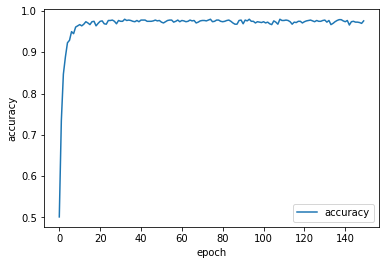

In [4]:
plt.plot(h.history['accuracy'])

plt.legend(['accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

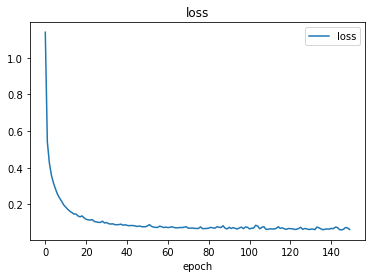

In [5]:
plt.plot(h.history['loss'])
plt.legend(['loss'])
plt.title('loss')
plt.xlabel('epoch')

In [6]:
def plot_decision_boundary(X, y, model):
    x_span = np.linspace(min(X[:, 0]) - 1, max(X[:, 0]) + 1)
    y_span = np.linspace(min(X[:, 1]) - 1, max(X[:, 1]) + 1)
    xx, yy = np.meshgrid(x_span, y_span)
    xx_, yy_ = xx.ravel(), yy.ravel()
    grid = np.c_[xx_, yy_]
    pred_func = model.predict(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx, yy, z)

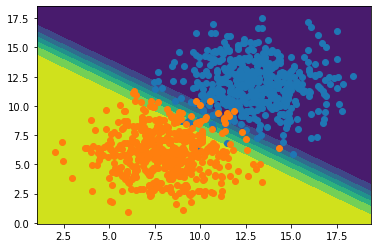

In [7]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts, 0], X[:n_pts, 1])
plt.scatter(X[n_pts:, 0], X[n_pts:, 1])

prediction is:  [[0.99988496]]


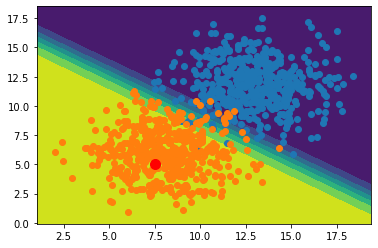

In [11]:
plot_decision_boundary(X, y, model)
plt.scatter(X[:n_pts, 0], X[:n_pts, 1])
plt.scatter(X[n_pts:, 0], X[n_pts:, 1])

x = 7.5
y = 5

point = np.array([[x, y]])
prediction = model.predict(point)
plt.plot([x], [y], marker='o', markersize=10, color="red")
print("prediction is: ", prediction)